In [2]:
import os
import numpy as np
import pandas as pd
import plotnine as p9

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [236]:
data = pd.read_excel('nightlight.xlsx')
list(data)

['Code',
 'Region',
 'Year',
 'Area Lit (Log, km2)',
 'Electricity Consumption (Log, Billion kWh)',
 'CO2 Emissions (Log, metric tonnes)',
 'Gross Domestic Product (Log, Billion (Nominal) Current US$)',
 'Population (Log)',
 'N2O Emissions (Log, kt of CO2 equivalent)',
 'CH4 Emissions (Log, kt of CO2 equivalent)',
 'HFC, PFC and SF6 Emissions (Log, kt of CO2 equivalent)',
 'Poverty Headcount Ratio (at national poverty lines)']

In [237]:
# Change col names 
data.columns = ['Code','Region','Year','Area Lit','Electricity Consumption','CO2 Emissions',
 'GDP','Population','N2O Emissions','CH4 Emissions','Fluoride Emissions','Poverty Headcount Ratio']

In [210]:
data.shape

(5405, 12)

In [211]:
list(data)

['Code',
 'Region',
 'Year',
 'Alit',
 'Electricity',
 'CO2',
 'GDP',
 'Population',
 'N2O',
 'CH4',
 'Fpol',
 'Poverty']

In [182]:
data.head()

,Code,Region,Year,Alit,Electricity,CO2,GDP,Population,N2O,CH4,Fpol,Poverty
0,ABW,Aruba,2013,4.794165,-0.177931,13.683593,NaN,11.541717,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2013,6.837424,1.518519,16.872742,3.011097,17.239203,NaN,NaN,NaN,NaN
2,AGO,Angola,2013,7.733642,1.950906,17.295641,4.821718,16.970304,NaN,NaN,NaN,NaN
3,AIA,Anguilla,2013,3.220334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALA,Aland Islands,2013,3.614013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
year_series = data.loc[:, 'Year']
year_count = pd.value_counts(year_series)

In [239]:
year_count

2011    246
2007    246
1996    246
2000    246
2004    246
2008    246
2012    246
1993    246
1997    246
2001    246
2005    246
2009    246
2013    246
1994    246
1998    246
2006    246
2010    246
1995    246
1999    246
2003    246
1992    246
2002    239
Name: Year, dtype: int64

In [240]:
corr = data.corr()['Area Lit'].drop(labels = 'Area Lit').abs()
corr_sorted = corr.sort_values(ascending = False)
corr_sorted

Electricity Consumption    0.929839
CO2 Emissions              0.928277
GDP                        0.912570
Population                 0.720005
CH4 Emissions              0.652776
N2O Emissions              0.602580
Poverty Headcount Ratio    0.418967
Fluoride Emissions         0.379041
Year                       0.097284
Name: Area Lit, dtype: float64

In [241]:
arealt = data[['Year', 'Area Lit']].copy()
arealt_grouped = arealt.groupby(['Year']).mean().reset_index()

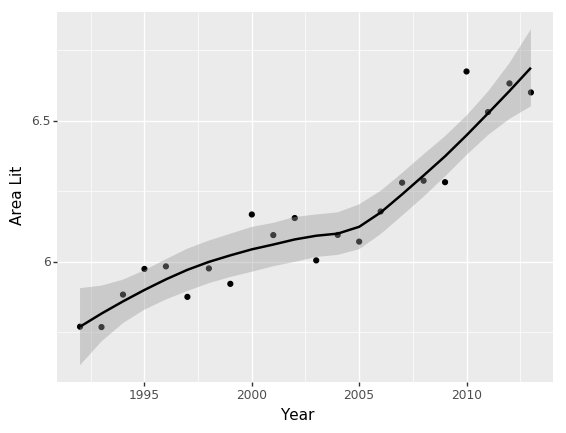

<ggplot: (7567709248)>

In [242]:
gg = p9.ggplot(arealt_grouped)
gg += p9.aes(x = 'Year', y = 'Area Lit' )
gg += p9.geom_point()
gg += p9.geom_smooth(method = 'loess')

gg

In [217]:
nl = data.copy()[['Code', 'Region','Year','Area Lit']]
nl_2013 = nl.loc[nl['Year'] == 2013]
nl_2013 = nl_2013.drop(columns = 'Year')

In [219]:
type(nl)
print(nl_2013.shape)
nl_2013.head()

(246, 3)


,Code,Region,Alit
0,ABW,Aruba,4.794165
1,AFG,Afghanistan,6.837424
2,AGO,Angola,7.733642
3,AIA,Anguilla,3.220334
4,ALA,Aland Islands,3.614013


In [192]:
colors = 9
value = 'Area Lit'
cmap = 'Blues'
figsize = (16, 10)
title = 'World Area Lit in 2013'

In [220]:
shapefile = 'ne_10m_admin_0_countries.shp'

In [221]:
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

In [222]:
nl_merged = gdf.merge(nl_2013, left_on='ADM0_A3', right_on='Code')

In [196]:
nl_merged.shape[0]

232

In [197]:
nl_2013.shape[0]

246

In [50]:
gdf.shape[0]

255

In [95]:
nl_merged.describe()

,Alit
count,208.000000
mean,6.653972
std,2.515803
min,-0.989244
25%,4.844466
50%,6.672405
75%,8.431627
max,13.004098


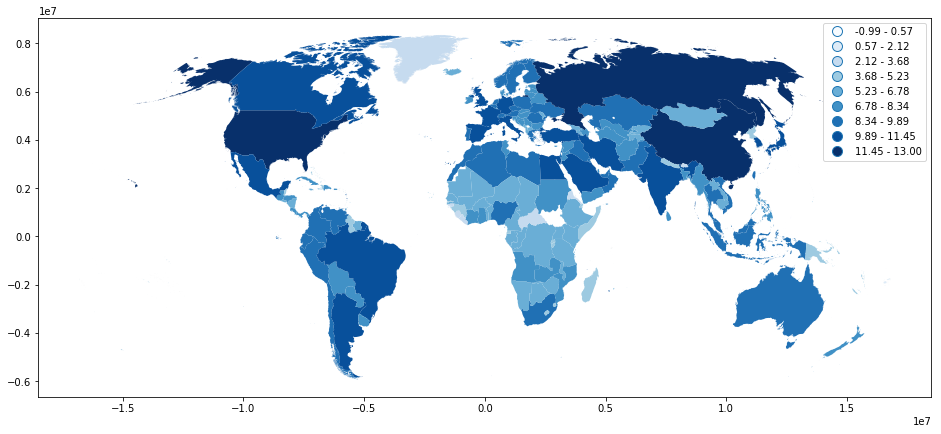

In [30]:
ax = nl_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

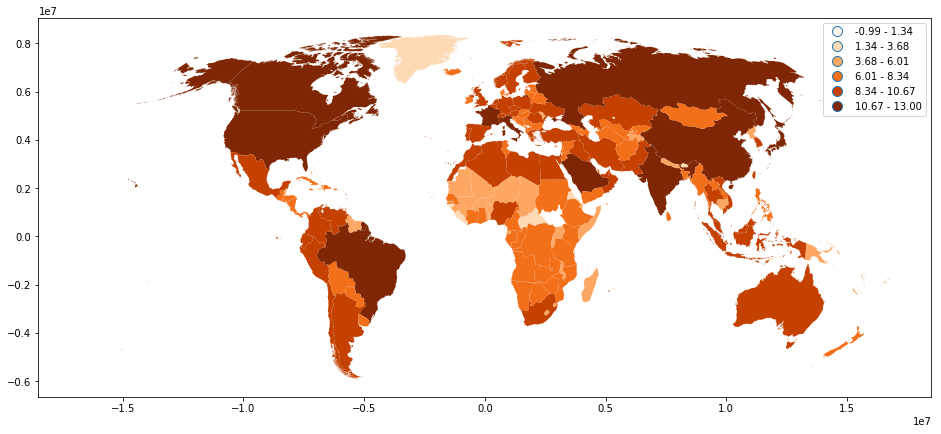

In [34]:
colors = 6
value = 'Alit'
cmap = 'Oranges'
figsize = (16, 10)
title = 'World Area Lit in 2013'
ax = nl_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

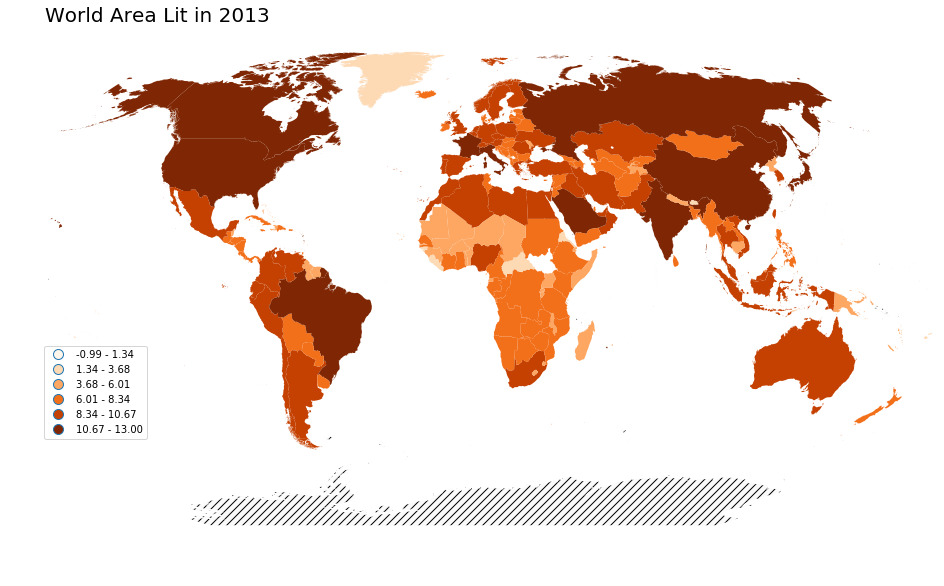

<Figure size 432x288 with 0 Axes>

In [36]:
nl_merged[nl_merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')

ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
# ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.get_figure()

In [38]:
from IPython.html.widgets import *

In [49]:
nlmin = np.floor(data['Area Lit'].describe()['min'])
nlmax = np.ceil(data['Area Lit'].describe()['max'])
print(nlmin, nlmax)

-2.0 14.0


In [ ]:


nl = data.copy()[['Code', 'Region','Year','Area Lit']]
nl_2013 = nl.loc[nl['Year'] == 2013]
nl_2013 = nl_2013.drop(columns = 'Year')

shapefile = 'ne_10m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
nl_merged = gdf.merge(nl_2013, left_on='ADM0_A3', right_on='Code')

colors = 6
value = 'Area Lit'
cmap = 'Oranges'
figsize = (16, 10)
title = 'World Area Lit in 2013'
# set the range for the choropleth
vmin, vmax = 120, 220

ax = nl_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
nl_merged[nl_merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')

ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
# ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.get_figure()

In [50]:
vmin = np.floor(data['Area Lit'].describe()['min'])
vmax = np.ceil(data['Area Lit'].describe()['max'])

In [97]:
# Write a function of multiple maps 1992 - 2013
nl = data.copy()[['Code', 'Region','Year','Area Lit']]
shapefile = 'ne_10m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
nl_merged = gdf.merge(nl_2013, left_on='ADM0_A3', right_on='Code')


colors = 6
value = 'Area Lit'
cmap = 'Oranges'
figsize = (16, 10)
title = 'World Area Lit'

def nlmap(yr):
    nl_sub = nl.loc[nl['Year'] == yr]
    nl_sub = nl_sub.drop(columns = 'Year')
    nl_merged = gdf.merge(nl_sub, left_on='ADM0_A3', right_on='Code')
    ax = nl_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
    nl_merged[nl_merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
    ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
    # ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
    ax.set_axis_off()
    ax.set_xlim([-1.5e7, 1.7e7])
    ax.get_legend().set_bbox_to_anchor((.12, .4))
    ax.get_figure()

In [98]:
interact(nlmap, yr = (1992, 2013, 1))

interactive(children=(IntSlider(value=2002, description='yr', max=2013, min=1992), Output()), _dom_classes=('w…

<function __main__.nlmap(yr)>

In [243]:
# Write a function of multiple maps 1992 - 2013 -- Final version

nl = data.copy()[['Code', 'Region','Year','Area Lit']]
vmin = np.floor(data['Area Lit'].describe()['min'])
vmax = np.ceil(data['Area Lit'].describe()['max'])
shapefile = 'ne_10m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
value = 'Area Lit'
colors = 6
cmap = 'Oranges'
figsize = (16, 10)
title = 'World Area Lit'

def nlmap(yr):
    nl_sub = nl.loc[nl['Year'] == yr]
    nl_sub = nl_sub.drop(columns = 'Year')
    nl_merged = gdf.merge(nl_sub, left_on='ADM0_A3', right_on='Code')
    ax = nl_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, vmin = vmin, vmax = vmax, k = colors, legend=True)
    nl_merged[nl_merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
    
    ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
    # ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
    ax.set_axis_off()
    ax.set_xlim([-1.5e7, 1.7e7])
    ax.get_legend()
    ax.get_figure()

In [244]:
interact(nlmap, yr = (1992, 2013, 1))

interactive(children=(IntSlider(value=2002, description='yr', max=2013, min=1992), Output()), _dom_classes=('w…

<function __main__.nlmap(yr)>

In [117]:
# Confirm 2002 Area lit missing for Russia
data.loc[(data['Region'] == 'Russia' )& data['Year'] == 2002] 

,Code,Region,Year,Alit,"Electricity Consumption (Log, Billion kWh)","CO2 Emissions (Log, metric tonnes)","Gross Domestic Product (Log, Billion (Nominal) Current US$)",Population (Log),"N2O Emissions (Log, kt of CO2 equivalent)","CH4 Emissions (Log, kt of CO2 equivalent)","HFC, PFC and SF6 Emissions (Log, kt of CO2 equivalent)",Poverty Headcount Ratio (at national poverty lines)


In [245]:
# Time trend
countrydf = pd.read_csv('Country.csv')

In [246]:
list(countrydf)

['CountryCode',
 'ShortName',
 'TableName',
 'LongName',
 'Alpha2Code',
 'CurrencyUnit',
 'SpecialNotes',
 'Region',
 'IncomeGroup',
 'Wb2Code',
 'NationalAccountsBaseYear',
 'NationalAccountsReferenceYear',
 'SnaPriceValuation',
 'LendingCategory',
 'OtherGroups',
 'SystemOfNationalAccounts',
 'AlternativeConversionFactor',
 'PppSurveyYear',
 'BalanceOfPaymentsManualInUse',
 'ExternalDebtReportingStatus',
 'SystemOfTrade',
 'GovernmentAccountingConcept',
 'ImfDataDisseminationStandard',
 'LatestPopulationCensus',
 'LatestHouseholdSurvey',
 'SourceOfMostRecentIncomeAndExpenditureData',
 'VitalRegistrationComplete',
 'LatestAgriculturalCensus',
 'LatestIndustrialData',
 'LatestTradeData',
 'LatestWaterWithdrawalData']

In [139]:
countrydf.shape >= data['Region'].unique().shape

True

In [247]:
country = countrydf.drop(columns = ['ShortName','TableName','LongName','Alpha2Code','CurrencyUnit','SpecialNotes'])

In [248]:
c_names = country.columns.tolist()
c_names[c_names.index('Region')] = 'Continent'
country.columns = c_names

In [249]:
country.head()

,CountryCode,Continent,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Middle East & North Africa,Upper middle income,DZ,1980,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1968 System of National Accou...,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,East Asia & Pacific,Upper middle income,AS,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Europe & Central Asia,High income: nonOECD,AD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [250]:
ind_merged = data.merge(country, left_on='Code', right_on = 'CountryCode' )

In [251]:
ind_merged.head()

,Code,Region,Year,Area Lit,Electricity Consumption,CO2 Emissions,GDP,Population,N2O Emissions,CH4 Emissions,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,ABW,Aruba,2013,4.794165,-0.177931,13.683593,NaN,11.541717,NaN,NaN,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,ABW,Aruba,2012,4.798167,-0.082621,14.079247,NaN,11.536574,NaN,NaN,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
2,ABW,Aruba,2011,4.794190,-0.092773,14.706916,0.949518,11.532100,NaN,NaN,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
3,ABW,Aruba,2010,4.782062,-0.088700,14.714407,0.903288,11.528769,NaN,NaN,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
4,ABW,Aruba,2009,4.661224,-0.179043,14.740918,0.915864,11.526986,NaN,NaN,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN


In [230]:
ind_merged['Continent'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [151]:
arealt_cty = ind_merged[['Year', 'Area Lit', 'Continent']].copy()

In [153]:
arealt_cty.head()

,Year,Alit,Continent
0,2013,4.794165,Latin America & Caribbean
1,2012,4.798167,Latin America & Caribbean
2,2011,4.794190,Latin America & Caribbean
3,2010,4.782062,Latin America & Caribbean
4,2009,4.661224,Latin America & Caribbean


In [155]:
arealt_cty = ind_merged[['Year', 'Alit', 'Continent']].copy()
arealt_ctygr= arealt_cty.groupby(['Year', 'Continent']).mean().reset_index()
arealt_ctygr

,Year,Continent,Alit
0,1992,East Asia & Pacific,5.481006
1,1992,Europe & Central Asia,6.833935
2,1992,Latin America & Caribbean,5.652701
3,1992,Middle East & North Africa,7.423454
4,1992,North America,8.922218
5,1992,South Asia,6.742781
6,1992,Sub-Saharan Africa,4.555128
7,1993,East Asia & Pacific,5.636609
8,1993,Europe & Central Asia,6.807469
9,1993,Latin America & Caribbean,5.771130


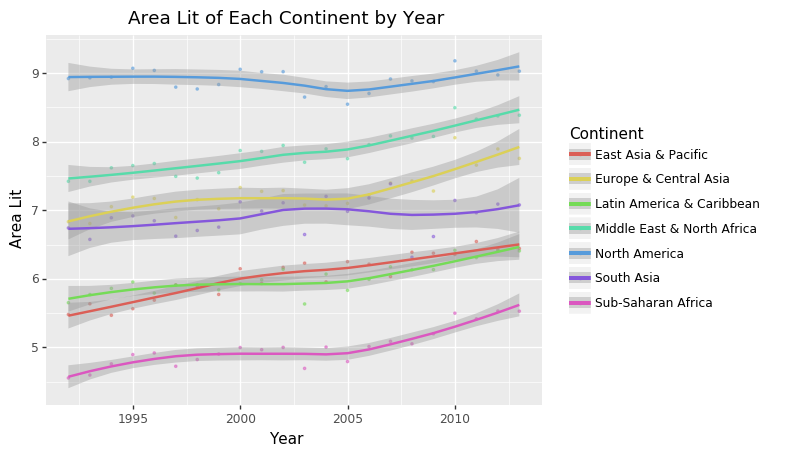

<ggplot: (7564021782)>

In [171]:
gg1 = p9.ggplot(arealt_ctygr)
gg1 += p9.aes(x = 'Year', y = 'Area Lit', color = 'Continent')
gg1 += p9.geom_point(alpha = 0.5, size=0.5)
gg1 += p9.geom_smooth(method = 'loess')
gg1 += p9.ggtitle('Area Lit of Each Continent by Year')
gg1 += p9.ylab('Area Lit') 
gg1 += p9.xlab('Year') 

gg1

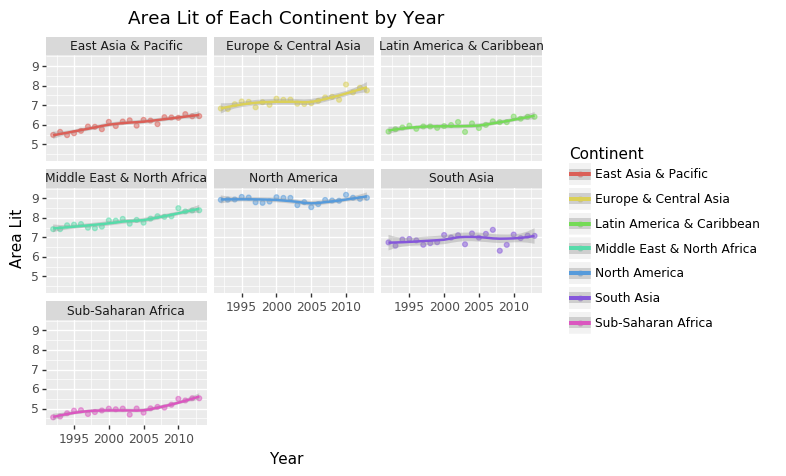

<ggplot: (7565760797)>

In [172]:
gg2 = p9.ggplot(arealt_ctygr)
gg2 += p9.aes(x = 'Year', y = 'Area Lit', color = 'Continent')
gg2 += p9.geom_point(alpha = 0.5)
gg2 += p9.geom_smooth(method = 'loess')
gg2 += p9.facet_wrap('~Continent')
gg2 += p9.ggtitle('Area Lit of Each Continent by Year')
gg2 += p9.ylab('Area Lit') 
gg2 += p9.xlab('Year')

gg2


In [254]:
list(ind_merged)

['Code',
 'Region',
 'Year',
 'Area Lit',
 'Electricity Consumption',
 'CO2 Emissions',
 'GDP',
 'Population',
 'N2O Emissions',
 'CH4 Emissions',
 'Fluoride Emissions',
 'Poverty Headcount Ratio',
 'CountryCode',
 'Continent',
 'IncomeGroup',
 'Wb2Code',
 'NationalAccountsBaseYear',
 'NationalAccountsReferenceYear',
 'SnaPriceValuation',
 'LendingCategory',
 'OtherGroups',
 'SystemOfNationalAccounts',
 'AlternativeConversionFactor',
 'PppSurveyYear',
 'BalanceOfPaymentsManualInUse',
 'ExternalDebtReportingStatus',
 'SystemOfTrade',
 'GovernmentAccountingConcept',
 'ImfDataDisseminationStandard',
 'LatestPopulationCensus',
 'LatestHouseholdSurvey',
 'SourceOfMostRecentIncomeAndExpenditureData',
 'VitalRegistrationComplete',
 'LatestAgriculturalCensus',
 'LatestIndustrialData',
 'LatestTradeData',
 'LatestWaterWithdrawalData']

In [293]:
# Define a function of continent-level time trends

def ctn_trend(c):
    c_sub = ind_merged[['Year', 'Continent', c]].copy()
    c_group = c_sub.groupby(['Year', 'Continent']).mean().reset_index()
    gg_c = p9.ggplot(c_group)
    gg_c += p9.aes(x = 'Year', y = c, color = 'Continent')
    gg_c += p9.geom_point(alpha = 0.5, size=0.5)
    gg_c += p9.geom_smooth(method = 'loess')
    gg_c += p9.ggtitle('{} of Each Continent by Year'.format(c))
    gg_c += p9.ylab(c) 
    gg_c += p9.xlab('Year')    
    return(gg_c)

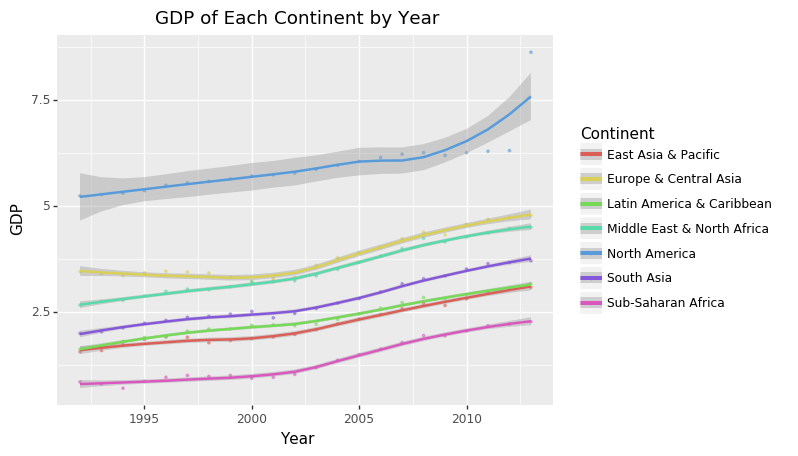

<ggplot: (7560048185)>

In [266]:
ctn_trend('GDP')

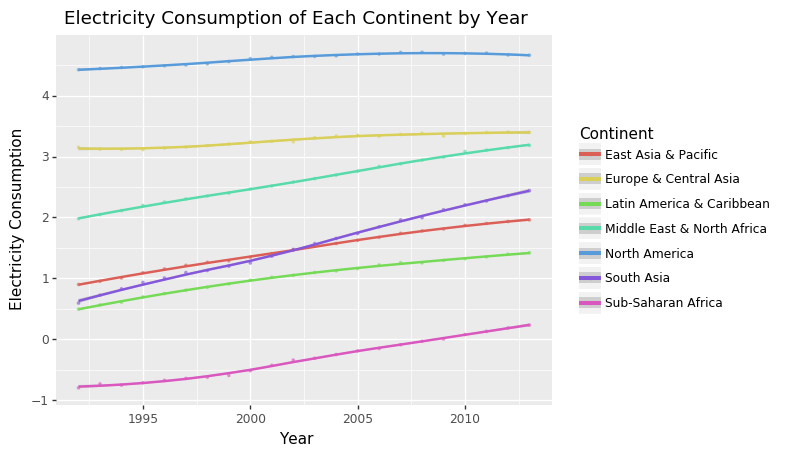

<ggplot: (-9223372029285435069)>

In [267]:
ctn_trend('Electricity Consumption')

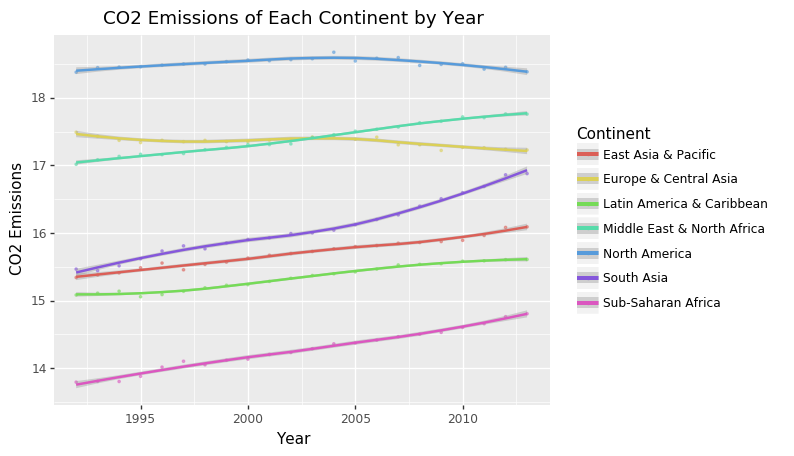

<ggplot: (-9223372029285432092)>

In [268]:
ctn_trend('CO2 Emissions')

In [297]:
# Try alternative
def ctn_gr(c):
    c_sub = ind_merged[['Year', 'Continent', c]].copy()
    c_group = c_sub.groupby(['Year', 'Continent']).mean().reset_index()
    return(c_group)

In [298]:
alit_ctn_trend, elec_ctn_trend, co2_ctn_trend, gdp_ctn_trend = \
ctn_gr('Area Lit'), ctn_gr('Electricity Consumption'),\
ctn_gr('CO2 Emissions'), ctn_gr('GDP')

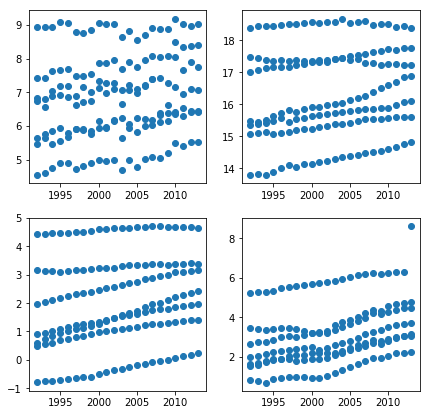

In [303]:
# Plotnine cannot draw subplots ...
# Cannot add smoother using matplotlib...
fig, axs = plt.subplots(2, 2, figsize = (7,7))
axs[0, 0].scatter(x = alit_ctn_trend['Year'], y = alit_ctn_trend['Area Lit'] )
axs[1, 0].scatter(x = elec_ctn_trend['Year'], y = elec_ctn_trend['Electricity Consumption'])
axs[0, 1].scatter(x = co2_ctn_trend['Year'], y = co2_ctn_trend['CO2 Emissions'])
axs[1, 1].scatter(x = gdp_ctn_trend['Year'], y = gdp_ctn_trend['GDP'])